## Apply KMeans clustering on the Employee_income.xlsx dataset and identify exact clusters using Elbow method to model the algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#### load data

In [2]:
df = pd.read_excel('Employee_income.xlsx')
df.head()

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000
3,Anita,28,62000
4,Sudhir,42,155000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

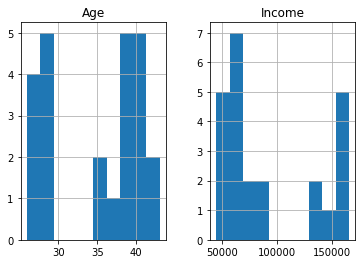

In [3]:
df.hist()

In [4]:
X = df[['Age','Income']]

In [5]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


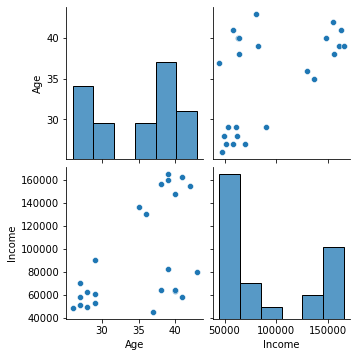

In [6]:
sns.pairplot(X)

#### choose 3 cluster

In [7]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

#### training: only X(input) is used

In [8]:
model.fit(X)

KMeans(n_clusters=3)

In [9]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


#### output clusters

In [10]:
model.labels_ 

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 1])

In [11]:
model.predict([[26,70000]])

array([2])

#### 3 centroids = 3 Clusters

In [12]:
model.cluster_centers_[:,0] # age data

array([32.5 , 38.75, 34.5 ])

In [13]:
model.cluster_centers_[:,1] # income data

array([ 56375., 151500.,  80500.])

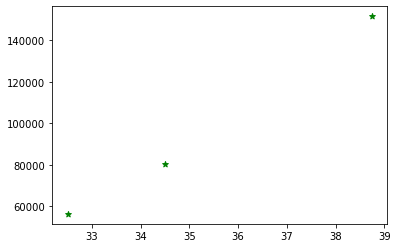

In [14]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='green',marker='*')

#### Testing phase

In [15]:
model.fit_predict(X)

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       1, 0])

In [16]:
X[:2]

,Age,Income
0,27,70000
1,29,90000


In [17]:
X['cluster'] = model.fit_predict(X)

In [18]:
X

,Age,Income,cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,62000,2
4,42,155000,1
5,39,160000,1
6,41,162000,1
7,38,156000,1
8,36,130000,1
9,35,136000,1


In [19]:
X.shape

(24, 3)

In [20]:
df1 = X[X['cluster']==0]
df2 = X[X['cluster']==1]
df3 = X[X['cluster']==2]

#### Input data and Cluster centroids

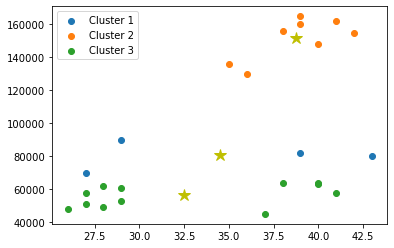

In [21]:
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')

plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='y',marker='*',markersize=12,linestyle=' ')
plt.legend()

In [22]:
X[:3]

,Age,Income,cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2


### Scaling is required for age and Income also
#### minmax = X - min(x) / max(x) - min(x)

In [23]:
scaler = MinMaxScaler() # normalizer [0-1]
scaler

MinMaxScaler()

In [24]:
df['Income'] = scaler.fit_transform(df[['Income']])

df['Age'] = scaler.fit_transform(df[['Age']])

In [25]:
df

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000
2,Shriya,0.176471,0.133333
3,Anita,0.117647,0.141667
4,Sudhir,0.941176,0.916667
5,Gajanan,0.764706,0.958333
6,Ranjit,0.882353,0.975000
7,Jyotsna,0.705882,0.925000
8,Nitish,0.588235,0.708333
9,Onkar,0.529412,0.758333


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

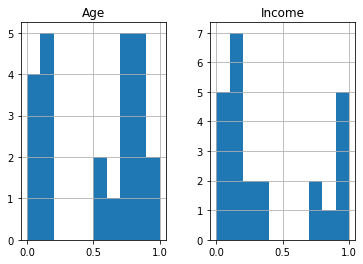

In [26]:
df.hist()

In [27]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

#### age and Income are now Normalized

In [28]:
y_pred = km.fit_predict(df[['Age','Income']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2])

In [29]:
km.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2])

In [30]:
df['Cluster'] = y_pred

In [31]:
df[:3]

,Name,Age,Income,Cluster
0,Amit,0.058824,0.208333,1
1,Akash,0.176471,0.375000,1
2,Shriya,0.176471,0.133333,1


#### Plotting after scaling

In [32]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

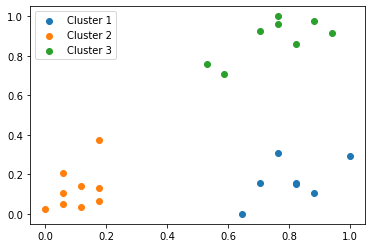

In [33]:
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')
plt.legend()

#### check the centroids of cluster

In [34]:
km.cluster_centers_

array([[0.80672269, 0.16785714],
       [0.10457516, 0.12731481],
       [0.75      , 0.8875    ]])

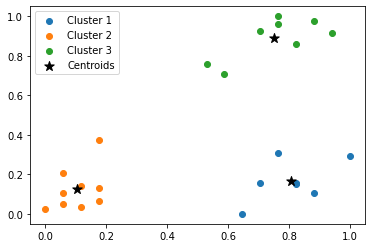

In [35]:
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,marker='*',color='k',label='Centroids')
plt.legend()

In [36]:
km.predict([[25,56000]])

array([2])

In [37]:
km.predict([[19,100]])
# remeber at the time testing also u must have to scale data

array([2])

In [38]:
test_data = df[['Age','Income']].sample(5)
test_data

,Age,Income
10,0.647059,0.000000
5,0.764706,0.958333
1,0.176471,0.375000
3,0.117647,0.141667
8,0.588235,0.708333


In [39]:
km.predict(test_data)

array([0, 2, 1, 1, 2])

#### WCSS: Within Cluster Sum of Square

In [40]:
km

KMeans(n_clusters=3)

In [41]:
km.inertia_

0.49201934314030626

In [42]:
X = X[['Age','Income']]
X

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,62000
4,42,155000
5,39,160000
6,41,162000
7,38,156000
8,36,130000
9,35,136000


In [43]:
wcss = []
for i in range(1,11):   # i will take 1 to 10 cluster
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [44]:
wcss

[45900990393.166664,
 3566610008.4999995,
 1820563121.5,
 907896426.6666665,
 396133821.3666666,
 265467154.53333336,
 201181388.1761905,
 147181292.1761905,
 109681292.1761905,
 76321188.16666667]

#### check elbow

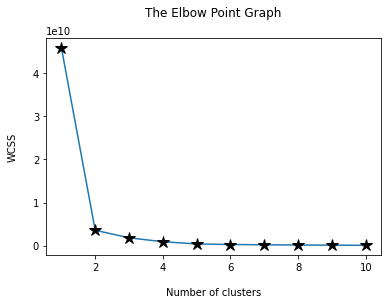

In [45]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linestyle=' ', marker='*', color='k', markersize=12)
plt.title('The Elbow Point Graph\n')
plt.xlabel('\nNumber of clusters')
plt.ylabel('WCSS\n')
plt.show()

### silhouette_score:

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


In [48]:
new = KMeans(n_clusters=2)
new

KMeans(n_clusters=2)

In [49]:
new.fit(X)

KMeans(n_clusters=2)

In [50]:
new.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0])

In [51]:
silhouette_score(X,new.labels_)

0.8256373088392316

In [52]:
score = []
for i in range(2,6):
    new = KMeans(n_clusters=i)
    new.fit(X)
    print((silhouette_score(X,new.labels_)))

0.8256373088392316
0.6684265690676864
0.6399217132425963
0.6692853416968179


In [53]:
score.append(silhouette_score(X,new.labels_))
print(score)

[0.6692853416968179]
